In [1]:
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import cv2

# Carregando os dados

<p>Descompactar o dataset na mesma pasta que deste repositorio. Os arquivos devem ficar na estrutura ./OIA-ODIR</p>
<p> O data set pode ser encontra nos links abaixo:
<br>[kaggle](https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k)
<br>[grand-challenge](https://odir2019.grand-challenge.org/dataset)</p>




In [2]:
path_ds_training = Path("./OIA-ODIR/Training Set/Annotation/training annotation (English).xlsx")
path_ds_training_img = Path("./OIA-ODIR/Training Set/Images")
path_ds_validation = Path("./OIA-ODIR/Off-site Test Set/Annotation/off-site test annotation (English).xlsx")
path_ds_validation_img = Path("./OIA-ODIR/Off-site Test Set/Images")
path_ds_test = Path("./OIA-ODIR/On-site Test Set/Annotation/on-site test annotation (English).xlsx")
path_ds_test_img = Path("./OIA-ODIR/On-site Test Set/Images")

ds_training = pd.read_excel(path_ds_training, index_col=0)
ds_validation = pd.read_excel(path_ds_validation, index_col=0)
ds_test = pd.read_excel(path_ds_test, index_col=0)

## Explorando os dados dentro das planilhas EXCEL

In [3]:
ds_training.head(10)

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
ID,,,,,,,,,,,,,,
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


In [4]:
ds_validation.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
ID,,,,,,,,,,,,,,
937,60,Female,937_left.jpg,937_right.jpg,hypertensive retinopathy,"hypertensive retinopathy,suspected diabetic re...",0,1,0,0,0,1,0,0
967,21,Female,967_left.jpg,967_right.jpg,moderate nonproliferative retinopathy,"moderate nonproliferative retinopathy,epiretin...",0,1,0,0,0,0,0,1
988,60,Female,988_left.jpg,988_right.jpg,mild nonproliferative retinopathy,"epiretinal membrane,moderate nonproliferative ...",0,1,0,0,0,0,0,1
995,56,Male,995_left.jpg,995_right.jpg,moderate nonproliferative retinopathy,"lens dust,retinal pigmentation",0,1,0,0,0,0,0,1
1000,63,Male,1000_left.jpg,1000_right.jpg,"laser spot,moderate nonproliferative retinopathy","moderate nonproliferative retinopathy,laser spot",0,1,0,0,0,0,0,1


In [5]:
ds_test.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
ID,,,,,,,,,,,,,,
198,68,Female,198_left.jpg,198_right.jpg,"cataract,hypertensive retinopathy","cataract,hypertensive retinopathy",0,0,0,1,0,1,0,0
663,60,Male,663_left.jpg,663_right.jpg,"cataract,hypertensive retinopathy","cataract,hypertensive retinopathy",0,0,0,1,0,1,0,0
1025,56,Female,1025_left.jpg,1025_right.jpg,"hypertensive retinopathy,macular epiretinal me...",hypertensive retinopathy,0,0,0,0,0,1,0,1
1139,53,Male,1139_left.jpg,1139_right.jpg,moderate nonproliferative retinopathy,"moderate nonproliferative retinopathy,macular ...",0,1,0,0,0,0,0,1
1141,63,Male,1141_left.jpg,1141_right.jpg,mild nonproliferative retinopathy,macular epiretinal membrane,0,1,0,0,0,0,0,1


In [6]:
ds_training.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 4784
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Age                3500 non-null   int64 
 1   Patient Sex                3500 non-null   object
 2   Left-Fundus                3500 non-null   object
 3   Right-Fundus               3500 non-null   object
 4   Left-Diagnostic Keywords   3500 non-null   object
 5   Right-Diagnostic Keywords  3500 non-null   object
 6   N                          3500 non-null   int64 
 7   D                          3500 non-null   int64 
 8   G                          3500 non-null   int64 
 9   C                          3500 non-null   int64 
 10  A                          3500 non-null   int64 
 11  H                          3500 non-null   int64 
 12  M                          3500 non-null   int64 
 13  O                          3500 non-null   int64 
dtypes: int64

### Ajustando o nome das colunas

In [7]:
columns = ["age", "sex", "left-file", "right-file", "left-keywords", "right-keywords", "N", "D", "G", "C", "A","H", "M", "O" ]
ds_training.columns = columns
ds_validation.columns = columns
ds_test.columns = columns

In [8]:
ds_training["age"].describe()

count    3500.000000
mean       57.854000
std        11.724064
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: age, dtype: float64

In [9]:
ds_training["left-keywords"].describe()

count              3500
unique              227
top       normal fundus
freq               1433
Name: left-keywords, dtype: object

In [10]:
ds_validation["age"].describe()

count    500.000000
mean      58.150000
std       11.990289
min        1.000000
25%       51.000000
50%       59.000000
75%       65.000000
max       95.000000
Name: age, dtype: float64

In [11]:
ds_validation["left-keywords"].describe()

count               500
unique               72
top       normal fundus
freq                215
Name: left-keywords, dtype: object

In [12]:
print('Menor: ', ds_training["age"].min())
print('Maior: ', ds_training["age"].max())
print('Media: ', ds_training["age"].mean())
print('Mediana', ds_training["age"].median())
print('Desvio Padrão', ds_training["age"].std())
print('Moda', ds_training["age"].mode()[0])

Menor:  1
Maior:  91
Media:  57.854
Mediana 59.0
Desvio Padrão 11.724063747825486
Moda 56


In [13]:
print("Total por Classificação dos dados de treinamento")
print('Normal:', ds_training.query("N == 1").age.count())
print('Diabetes:', ds_training.query("D == 1").age.count())
print('Glaocoma:', ds_training.query("G == 1").age.count())
print('Catarata:', ds_training.query("C == 1").age.count())
print('Age:', ds_training.query("A == 1").age.count())
print('Hiperpressão:', ds_training.query("H == 1").age.count())
print('Miopia D:', ds_training.query("M == 1").age.count())
print('outros:', ds_training.query("O == 1").age.count())
print('TOTAL: ',ds_training.shape[0])

Total por Classificação dos dados de treinamento
Normal: 1140
Diabetes: 1128
Glaocoma: 215
Catarata: 212
Age: 164
Hiperpressão: 103
Miopia D: 174
outros: 979
TOTAL:  3500


In [14]:
print("Total por Classificação dos dados de validação")
print('Normal:', ds_validation.query("N == 1").age.count())
print('Diabetes:', ds_validation.query("D == 1").age.count())
print('Glaocoma:', ds_validation.query("G == 1").age.count())
print('Catarata:', ds_validation.query("C == 1").age.count())
print('Age', ds_validation.query("A == 1").age.count())
print('Hiperpressão:', ds_validation.query("H == 1").age.count())
print('Miopia D:', ds_validation.query("M == 1").age.count())
print('outros:', ds_validation.query("O == 1").age.count())
print('TOTAL: ',ds_validation.shape[0])

Total por Classificação dos dados de validação
Normal: 162
Diabetes: 163
Glaocoma: 32
Catarata: 31
Age 25
Hiperpressão: 16
Miopia D: 23
outros: 136
TOTAL:  500


In [15]:
print("Total por Classificação dos dados de validação")
print('Normal:', ds_test.query("N == 1").age.count())
print('Diabetes:', ds_test.query("D == 1").age.count())
print('Glaocoma:', ds_test.query("G == 1").age.count())
print('Catarata:', ds_test.query("C == 1").age.count())
print('Age:', ds_test.query("A == 1").age.count())
print('Hiperpressão:', ds_test.query("H == 1").age.count())
print('Miopia D:', ds_test.query("M == 1").age.count())
print('outros:', ds_test.query("O == 1").age.count())
print('TOTAL:',ds_test.shape[0])

Total por Classificação dos dados de validação
Normal: 324
Diabetes: 327
Glaocoma: 58
Catarata: 65
Age: 49
Hiperpressão: 30
Miopia D: 46
outros: 275
TOTAL: 1000


In [16]:
ds_training.corr()

C:\Users\AsusTon\AppData\Local\Temp\ipykernel_15004\4196017394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds_training.corr()


,age,N,D,G,C,A,H,M,O
age,1.000000,-0.073049,-0.080539,0.097791,0.186160,0.058005,-0.024944,-0.013635,0.067764
N,-0.073049,1.000000,-0.479285,-0.177807,-0.176481,-0.154101,-0.121023,-0.158968,-0.433113
D,-0.080539,-0.479285,1.000000,-0.094946,-0.075154,-0.106614,0.042701,-0.104288,-0.017049
G,0.097791,-0.177807,-0.094946,1.000000,-0.049996,0.005212,0.011778,-0.020193,-0.029528
C,0.186160,-0.176481,-0.075154,-0.049996,1.000000,-0.056300,-0.030041,-0.058079,-0.075515
A,0.058005,-0.154101,-0.106614,0.005212,-0.056300,1.000000,-0.006610,-0.032053,-0.089978
H,-0.024944,-0.121023,0.042701,0.011778,-0.030041,-0.006610,1.000000,-0.039828,-0.063315
M,-0.013635,-0.158968,-0.104288,-0.020193,-0.058079,-0.032053,-0.039828,1.000000,-0.013677
O,0.067764,-0.433113,-0.017049,-0.029528,-0.075515,-0.089978,-0.063315,-0.013677,1.000000


<AxesSubplot: ylabel='Frequency'>

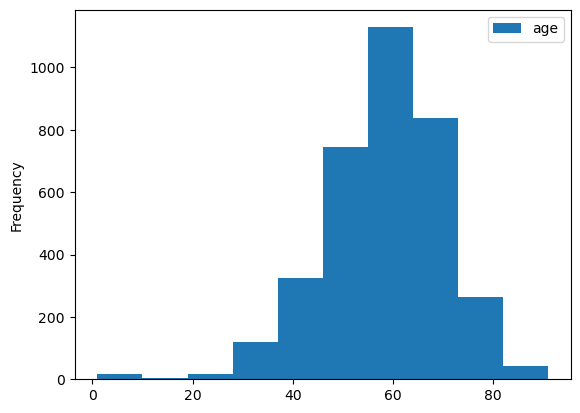

In [17]:
ds_training.plot(kind = 'hist', y = 'age')

<AxesSubplot: ylabel='Frequency'>

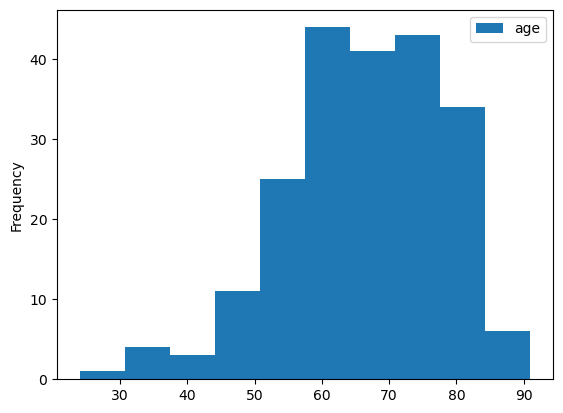

In [18]:
ds_training.query("C == 1").plot(kind = 'hist', y = 'age')

<AxesSubplot: ylabel='Frequency'>

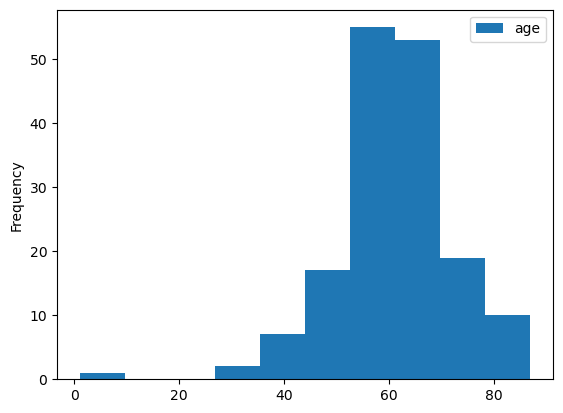

In [19]:
ds_training.query("A == 1").plot(kind = 'hist', y = 'age')

<AxesSubplot: ylabel='Frequency'>

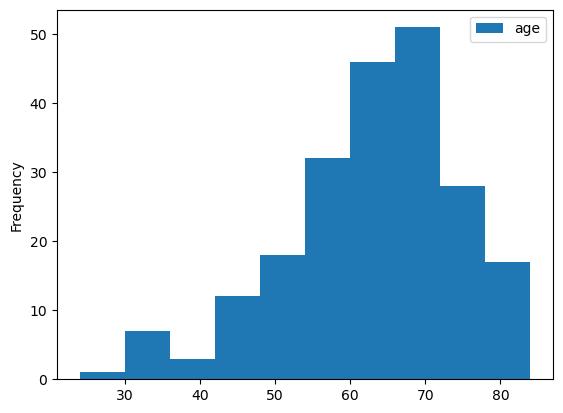

In [20]:
ds_training.query("G == 1").plot(kind = 'hist', y = 'age')

<AxesSubplot: ylabel='Frequency'>

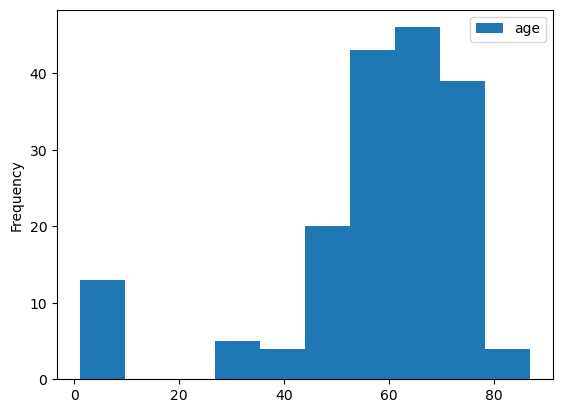

In [21]:
ds_training.query("M == 1").plot(kind = 'hist', y = 'age')

# Ajustando o dataset por olho

In [22]:

left_features = ["left-file", "left-keywords", "N", "D", "G", "C", "A","H", "M", "O" ]
left_ds_training_eye = ds_training[left_features]
left_ds_training_eye.insert(1, "side","left")


left_ds_training_eye = left_ds_training_eye.rename(columns={
                                                            "left-file": "file_name", 
                                                            "left-keywords":"keywords"  })


right_features = ["right-file", "right-keywords", "N","D", "G", "C", "A", "H","M","O"]
right_ds_training_eye = ds_training[right_features]
right_ds_training_eye.insert(1, "side","right")


right_ds_training_eye = right_ds_training_eye.rename(columns={"right-file": "file_name", 
                                                            "right-keywords":"keywords"})

ds_training_eye = pd.concat([left_ds_training_eye, right_ds_training_eye], ignore_index=True)
ds_training_eye =  ds_training_eye.sort_values(by=["file_name"],ignore_index=True)



In [23]:
## Dataset separado por olho

In [24]:
ds_training_eye.head(15)

,file_name,side,keywords,N,D,G,C,A,H,M,O
0,0_left.jpg,left,cataract,0,0,0,1,0,0,0,0
1,0_right.jpg,right,normal fundus,0,0,0,1,0,0,0,0
2,1005_left.jpg,left,macular hole,0,0,0,0,0,0,0,1
3,1005_right.jpg,right,normal fundus,0,0,0,0,0,0,0,1
4,1006_left.jpg,left,normal fundus,0,0,0,0,0,0,0,1
5,1006_right.jpg,right,macular epiretinal membrane,0,0,0,0,0,0,0,1
6,1008_left.jpg,left,normal fundus,0,0,0,0,0,0,0,1
7,1008_right.jpg,right,epiretinal membrane,0,0,0,0,0,0,0,1
8,100_left.jpg,left,macular epiretinal membrane,0,0,0,0,0,0,0,1
9,100_right.jpg,right,normal fundus,0,0,0,0,0,0,0,1


In [25]:
ds_training_eye.tail(15)

,file_name,side,keywords,N,D,G,C,A,H,M,O
6985,993_right.jpg,right,macular epiretinal membrane，laser spot，lens du...,0,1,0,0,0,0,0,1
6986,994_left.jpg,left,normal fundus,0,0,0,0,0,0,0,1
6987,994_right.jpg,right,chorioretinal atrophy,0,0,0,0,0,0,0,1
6988,996_left.jpg,left,myelinated nerve fibers,0,0,0,0,0,0,0,1
6989,996_right.jpg,right,normal fundus,0,0,0,0,0,0,0,1
6990,997_left.jpg,left,diabetic retinopathy，post laser photocoagulation,0,1,0,0,0,0,0,1
6991,997_right.jpg,right,diabetic retinopathy，post laser photocoagulation,0,1,0,0,0,0,0,1
6992,998_left.jpg,left,dry age-related macular degeneration，hypertens...,0,0,0,0,1,1,0,0
6993,998_right.jpg,right,dry age-related macular degeneration，hypertens...,0,0,0,0,1,1,0,0
6994,999_left.jpg,left,cataract,0,0,0,1,0,0,0,0


In [26]:
ds_training_eye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7000 non-null   object
 1   side       7000 non-null   object
 2   keywords   7000 non-null   object
 3   N          7000 non-null   int64 
 4   D          7000 non-null   int64 
 5   G          7000 non-null   int64 
 6   C          7000 non-null   int64 
 7   A          7000 non-null   int64 
 8   H          7000 non-null   int64 
 9   M          7000 non-null   int64 
 10  O          7000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 601.7+ KB


### Metodos Auxiliares para a reclassificação das imagens

In [27]:
separador = ","

def ajusta_separador(keywords):
    return keywords.replace("，", ",")

def classifica_desconsiderar(keywords):
    
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        #key == "lens dust" or key == "optic disk photographically invisible"
        if key == "low image quality" or key == "image offset":
            return 1
    
    return 0

def classifica_normal(keywords):
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        if key == "normal fundus":
            return 1
    
    return 0

def classifica_diabetes(keywords):
    keys = keywords.split(separador)

    for key in keys:
        key = key.strip()
        
        if key == "moderate non proliferative retinopathy" or key == "mild nonproliferative retinopathy" or key == "diabetic retinopathy" or key == "proliferative diabetic retinopathy" or key == "severe nonproliferative retinopathy":
            return 1
    
    return 0

def classifica_glaucoma(keywords):
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        if key == "glaucoma" or key == "suspected glaucoma":
            return 1
    
    return 0

def classifica_cataract(keywords):
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        if key == "cataract":
            return 1
    
    return 0

def classifica_degeneracao_macular(keywords):
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        if key == "dry age-related macular degeneration" or  key == "wet age-related macular degeneration" or key == "age-related macular degeneration":
            return 1
    
    return 0

def  classifica_pressao_alta(keywords):
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        if key == "hypertensive retinopathy":
            return 1
    
    return 0

def  classifica_miopia_patologica(keywords):
    keys = keywords.split(separador)
    
    for key in keys:
        key = key.strip()
        if key == "pathological myopia":
            return 1
    
    return 0

def classifica_outras(keywords):
    """
        N - Normal
        D - Diabetes
        G - Glaucoma
        C - Catarata
        A - Degeneração macular
        H - Pressão alta
        M - Miopia patológica 
        O - Outros
    """
    
    
    keys = keywords.split(separador)
    for key in keys:
        key = key.strip()
        if key == "normal fundus":
            break
    
        if key == "moderate non proliferative retinopathy" or key == "mild nonproliferative retinopathy" or key == "diabetic retinopathy" or key == "proliferative diabetic retinopathy" or key == "severe nonproliferative retinopathy":
            break

        if key == "glaucoma" or key == "suspected glaucoma":
            key

        if key == "cataract":
            break

        if key == "dry age-related macular degeneration" or  key == "wet age-related macular degeneration" or key == "age-related macular degeneration":
            break

        if key == "hypertensive retinopathy":
            break

        if key == "pathological myopia":
            break
        
        if key == "anterior segment image" or key == "no fundus image" or key == "lens dust" or key == "optic disk photographically invisible" or key ==  "low image quality":
            break
        
        return 1
    
    return 0

In [28]:
ds_training_eye["keywords"] = ds_training_eye["keywords"].map(ajusta_separador)

ds_training_eye["N"] = ds_training_eye["keywords"].map(classifica_normal)
ds_training_eye["D"] = ds_training_eye["keywords"].map(classifica_diabetes)
ds_training_eye["G"] = ds_training_eye["keywords"].map(classifica_glaucoma)
ds_training_eye["C"] = ds_training_eye["keywords"].map(classifica_cataract)
ds_training_eye["A"] = ds_training_eye["keywords"].map(classifica_degeneracao_macular)
ds_training_eye["H"] = ds_training_eye["keywords"].map(classifica_pressao_alta)
ds_training_eye["M"] = ds_training_eye["keywords"].map(classifica_miopia_patologica)
ds_training_eye["O"] = ds_training_eye["keywords"].map(classifica_outras)
ds_training_eye["X"] = ds_training_eye["keywords"].map(classifica_desconsiderar)
    

In [29]:
ds_training_eye["total"]  = ds_training_eye.N +  ds_training_eye.D + ds_training_eye.G + ds_training_eye.C + ds_training_eye.A + ds_training_eye.H + ds_training_eye.M + ds_training_eye.O + ds_training_eye.X

In [30]:
ds_training_eye.head(25)

,file_name,side,keywords,N,D,G,C,A,H,M,O,X,total
0,0_left.jpg,left,cataract,0,0,0,1,0,0,0,0,0,1
1,0_right.jpg,right,normal fundus,1,0,0,0,0,0,0,0,0,1
2,1005_left.jpg,left,macular hole,0,0,0,0,0,0,0,1,0,1
3,1005_right.jpg,right,normal fundus,1,0,0,0,0,0,0,0,0,1
4,1006_left.jpg,left,normal fundus,1,0,0,0,0,0,0,0,0,1
5,1006_right.jpg,right,macular epiretinal membrane,0,0,0,0,0,0,0,1,0,1
6,1008_left.jpg,left,normal fundus,1,0,0,0,0,0,0,0,0,1
7,1008_right.jpg,right,epiretinal membrane,0,0,0,0,0,0,0,1,0,1
8,100_left.jpg,left,macular epiretinal membrane,0,0,0,0,0,0,0,1,0,1
9,100_right.jpg,right,normal fundus,1,0,0,0,0,0,0,0,0,1


In [31]:
print("Total com mais de 1 diagnostico:", ds_training_eye.query("total > 1").side.count())
print(ds_training_eye.query("total > 1 and D == 1").side.count())
print(ds_training_eye.query("total > 1 and G == 1").side.count())
print(ds_training_eye.query("total > 1 and C == 1").side.count())
print(ds_training_eye.query("total > 1 and A == 1").side.count())
print(ds_training_eye.query("total > 1 and H == 1").side.count())
print(ds_training_eye.query("total > 1 and M == 1").side.count())
print(ds_training_eye.query("total > 1 and O == 1").side.count())
print(ds_training_eye.query("total > 1 and X == 1").side.count())

Total com mais de 1 diagnostico: 564
259
319
23
37
81
12
427
1


In [32]:
ds_training_eye.query("total == 1 and D == 1").side.count()

1527

In [33]:
print("Total com 1 diagnostigo por olho:", ds_training_eye.query("total == 1").side.count())
print(ds_training_eye.query("total == 1 and D == 1").side.count())
print(ds_training_eye.query("total == 1 and G == 1").side.count())
print(ds_training_eye.query("total == 1 and C == 1").side.count())
print(ds_training_eye.query("total == 1 and A == 1").side.count())
print(ds_training_eye.query("total == 1 and H == 1").side.count())
print(ds_training_eye.query("total == 1 and M == 1").side.count())
print(ds_training_eye.query("total == 1 and O == 1").side.count())
print(ds_training_eye.query("total == 1 and X == 1").side.count())

Total com 1 diagnostigo por olho: 6390
1527
7
290
243
112
234
859
21


In [34]:
ds_training_eye.query("total > 1 and N == 1").head(30)

,file_name,side,keywords,N,D,G,C,A,H,M,O,X,total
6728,875_left.jpg,left,"epiretinal membrane,normal fundus,lens dust",1,0,0,0,0,0,0,1,0,2


In [35]:
def EncontrarMargemEsquerda(img):
    altura, largura = img.shape[:2]
    centro = altura // 2
    for pixel in range(largura):
        if img[centro][pixel][0] > 10 or img[centro][pixel][1] > 10 or img[centro][pixel][2] > 10:
            return pixel
            break
    
    return 0
    
def EncontrarMargemDireita(img):
    altura, largura = img.shape[:2]
    largura = largura - 1
    centro = altura // 2
    for pixel in range(largura, -1, -1):
        if img[centro][pixel][0] > 10 or img[centro][pixel][1] > 10 or img[centro][pixel][2] > 10:
            return pixel
            break
    
    return 0

def EncontrarMargemSuperior(img):
    altura, largura = img.shape[:2]
    centro = largura // 2
    for pixel in range(altura):
        if img[pixel][centro][0] > 10 or img[pixel][centro][1] > 10 or img[pixel][centro][2] > 10:
            return pixel
            break
    
    return 0

def EncontrarMargemInferior(img):
    altura, largura = img.shape[:2]
    altura = altura - 1
    centro = largura // 2
    for pixel in range(altura, -1, -1):
        if img[pixel][centro][0] > 10 or img[pixel][centro][1] > 10 or img[pixel][centro][2] > 10:
            return pixel
            break
    
    return 0
    
def RemoverMargens(img):
    margemEsq = EncontrarMargemEsquerda(img)
    margemDir = EncontrarMargemDireita(img)
    margemSup = EncontrarMargemSuperior(img)
    margemInf = EncontrarMargemInferior(img)
    return img[margemSup: margemInf, margemEsq:margemDir]
    
    

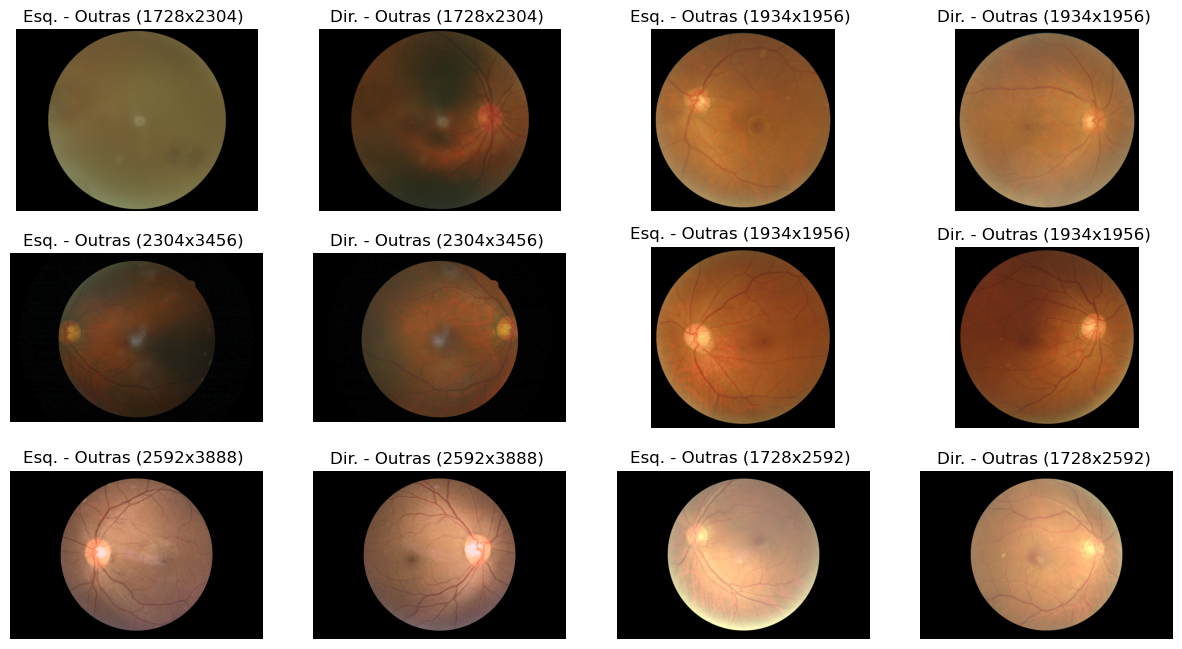

In [40]:
IMG_HEIGHT = 500
IMG_WIDTH = 500

fig, axis = plt.subplots(3, 4, figsize=(15, 8), frameon=False)
c = 0
for i in range(3):
    for j in range(4):
        axis[i][j].set_axis_off()
               
        file_name = ds_training_eye.file_name.iloc[c]
         
        img_path = path_ds_training_img / file_name
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        h, w = img.shape[:2]
        
        #img = RemoverMargens(img)        
        
        #if ds_training_eye.eye.iloc[c] == "right":
            #img = cv2.flip(img, 1)
            
        #img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT))
        
        axis[i][j].imshow(img)

        label = ""
        if ds_training_eye.side.iloc[c] == "left":
            label="Esq."
        else:
            label="Dir."
        
        if ds_training_eye.N.iloc[c] == "1":
            label = label + ' - Normal'
        elif ds_training_eye.D.iloc[c] == "1":
            label = label + ' - Diabetes'
        elif ds_training_eye.G.iloc[c] == "1":
            label = label + ' - Glaucoma'
        elif ds_training_eye.C.iloc[c] == "1":
            label = label + ' - Catarata'
        elif ds_training_eye.A.iloc[c] == "1":
            label = label + ' - Deg. macular'
        elif ds_training_eye.H.iloc[c] == "1":
            label = label + ' - Pressão alta'
        elif ds_training_eye.M.iloc[c] == "1":
            label = label + ' - Mi. patológica'
        else:
            label = label + ' - Outras'
    
        label = label + " (" + str(h) + "x" + str(w) + ") "
        
        axis[i, j].set_title(label)
    
        
        c+=1